# Cleaning - missing and duplicate data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Generate a t-shirt order<br>
have a name, a t-shirt size, a t-shirt color and a weight(in pounds)<br>
Uses the <a href="https://pypi.org/project/names/https://pypi.org/project/names/">names </a> module to generate random names

In [85]:
import utils as ut
df = ut.generate_tshirt_order()
df

,weight,t_shirt_size,t_shirt_color,name
0,115.195510,small,orange,Nicholas Espinoza
1,99.824419,small,orange,Carl Simoneaux
2,85.791655,small,blue,Frank Mccallum
3,97.350047,small,blue,Raleigh Kennedy
4,93.722678,small,green,Nathaniel Jesus
...,...,...,...,...
295,200.111119,large,orange,Douglas Pagan
296,181.741015,large,orange,David Tynes
297,159.700648,large,red,Carlton Smith
298,238.233897,large,blue,Joanna Lewis


### Make some duplicates

In [55]:
# make some duplicates just to show how to handle duplicates (delete them)
#lets find the oldest male and female
def fun1(df,numb=5):
    #generates numb rows from df
    return (df.iloc[0:numb,:])


#generates numb rows from each group to be used as duplicates
df_dups=df.groupby('t_shirt_size').apply(fun1, numb=5)
df_dups

weight t_shirt_size t_shirt_color               name
t_shirt_size                                                              
large        200  175.806332        large         black      Wilda Englert
             201  171.565476        large           red        Daryl Brown
             202  171.112118        large         green   Danielle Edmonds
             203  153.318687        large          blue     Robert Kingery
             204  215.362323        large         black   George Mcdonnell
med          100  139.421949          med           red        Royce Myers
             101  153.059410          med          blue        James Bogan
             102  156.298322          med        orange     Henry Mcintosh
             103  154.135483          med         green   Stephen Roberson
             104  125.167627          med        orange      James Aquilar
small        0    105.609500        small         black         George May
             1    109.797011        small         black  Samuel Montgomery
             2     95.883111        small        orange        Paula Moore
             3    104.410387        small           red       Steven Lopez
             4     91.628573        small         black         Mary Marks

### Append to original dataframe

In [56]:
df=df.append(df_dups, ignore_index=True)
len(df)

315

In [57]:
df.name.duplicated().sum()

16

### randomly select 20% of rows for t_shirt_size ommision

In [58]:
#first save orig size for later comparison
df['t_shirt_size_orig'] = df['t_shirt_size']

In [59]:
import random
res = random.sample(range(0, len(df)), int(0.2 * len(df)))
print(f'Number of rows to have "t_shirt_size" set to np.Nan is {len(res)}' )
for loc in res:
    df.loc[loc,'t_shirt_size'] = np.NaN

Number of rows to have "t_shirt_size" set to np.Nan is 63


In [60]:
#how many are null?
df.t_shirt_size.isna().sum()

65

In [61]:
#show the missing data
df[df.t_shirt_size.isna()]

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
3,104.410387,NaN,red,Steven Lopez,small
5,97.890768,NaN,green,Barbara Flynn,small
9,95.713558,NaN,black,Kathleen Reese,small
11,101.584207,NaN,black,Phil Watson,small
24,95.418130,NaN,blue,Denise Thompson,small
28,130.603765,NaN,red,Samuel Cross,small
35,95.344615,NaN,orange,Amanda Trafton,small
46,105.777448,NaN,green,Mary Hermes,small
58,124.560917,NaN,red,Brian Malec,small
68,87.355573,NaN,orange,Erin Cook,small


### Lets take a look at the distribution

#### kind ='hist', hist will bin the number of weights and display them, hue will determine which color group they belong to

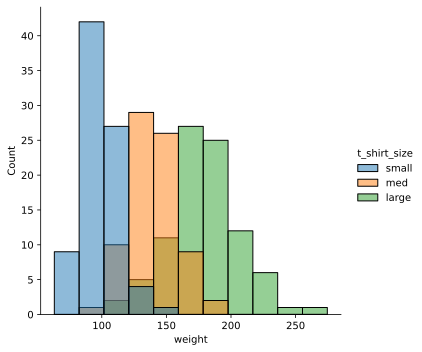

In [62]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='hist', fill=True);

#### kind ='kde', kde is a kernel density estimater, essentially calculates a gaussian distribution around each point, and then adds these distributions, and then divides by the number of points to get the smooth curves you see that have an area of 1.  I'm showing it because its easier to see the distributions

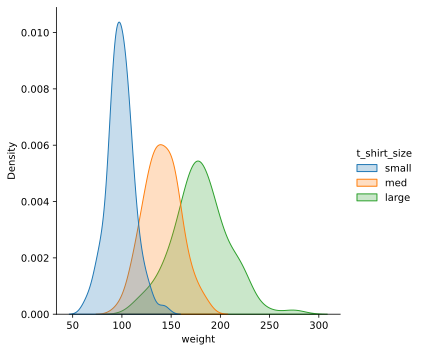

In [64]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='kde', fill=True);

## What to do about duplicates?  Delete them!

### Find them first

In [65]:
df.duplicated(keep=False).sum()

22

### Visually Verify 

In [66]:
df[df.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
302,171.112118,large,green,Danielle Edmonds,large
202,171.112118,large,green,Danielle Edmonds,large
201,171.565476,large,red,Daryl Brown,large
301,171.565476,large,red,Daryl Brown,large
309,125.167627,med,orange,James Aquilar,med
104,125.167627,med,orange,James Aquilar,med
306,153.059410,med,blue,James Bogan,med
101,153.059410,med,blue,James Bogan,med
314,91.628573,small,black,Mary Marks,small
4,91.628573,small,black,Mary Marks,small


### Looks good lets dump them

In [67]:
df.drop_duplicates(inplace=True)

## What if one of the duplicated rows is missing the t-shirt size?  Then duplicated() will not find it.  Maybe we should check for duplicates in the 'name' column instead

In [68]:
df.name.duplicated(keep=False).sum()

10

### Verify that they are duplicates first

In [69]:
df[df.name.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
0,105.609500,small,black,George May,small
310,105.609500,NaN,black,George May,small
204,215.362323,NaN,black,George Mcdonnell,large
304,215.362323,large,black,George Mcdonnell,large
102,156.298322,med,orange,Henry Mcintosh,med
307,156.298322,NaN,orange,Henry Mcintosh,med
2,95.883111,small,orange,Paula Moore,small
312,95.883111,NaN,orange,Paula Moore,small
113,151.972797,med,green,Steven Smith,med
299,194.855945,None,black,Steven Smith,None


### We want to delete the one that has a np.nan for t_shirt_size.

In [70]:
df.drop( df[df.name.duplicated(keep=False) & (df.t_shirt_size.isna())].index, inplace=True)

## Duplicates are gone, now how to impute the missing fields

### One way is to use SimpleImputer and assign the median value to all the missing values


In [71]:
df_med=df.copy()

In [72]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  #works with strings
imp = imp.fit(df_med[['t_shirt_size']])   #here is where it determines what the most frequent is
df_med['impute_t_shirt_size']=imp.transform(df_med[['t_shirt_size']])  #here is where the transform is applied to create a new column 

In [73]:
# how many match
def printstats(df):
    tmp = df[(df['t_shirt_size'].isna())]
    numb=len(tmp)
    numbmatches=(tmp['t_shirt_size_orig']==tmp['impute_t_shirt_size']).sum()
    print(f'Correctly imputed {numbmatches} out of {numb} missing values')
printstats(df_med)

Correctly imputed 12 out of 57 missing values


In [74]:
#show calculated verses actual
# df_med[df_med['t_shirt_size'].isna()]

### Another way is to find the mean weight for each t-shirt size, and then assign missing value t-shirt size based on weight<br>
For each NaN assign t-shirt size to closest mean

#### First calculate average weight for each t-shirt size

In [84]:
df_better=df.copy()

In [76]:
avgs = df_better.groupby('t_shirt_size').mean()
avgs.weight

t_shirt_size
large    180.332682
med      140.720135
small     98.659910
Name: weight, dtype: float64

In [77]:
#how many in each group
df_better.groupby('t_shirt_size').count()

,weight,t_shirt_color,name,t_shirt_size_orig
t_shirt_size,,,,
large,87,87,87,87
med,74,74,74,74
small,81,81,81,81


In [78]:
#map works on a column apply works on a row, which means we have access tothe entire row

def func(row):
    if row.t_shirt_size is np.NaN:
        #get a list of differences between this weight and average weights
        lst_vals = [abs(row.weight-val) for val in avgs.weight]

        #get the index of the minimum value
        min_val = min(lst_vals)
        min_index=lst_vals.index(min_val)

        #return t_shirt_size corresponding to this index
        return avgs.index[min_index]
    #its not missing, return what's there
    return row.t_shirt_size
df_better['impute_t_shirt_size'] = df.apply(func, axis=1)

In [79]:
printstats(df_better)

Correctly imputed 42 out of 57 missing values


In [81]:
#show calculated verses actual
# df_better[df_better['t_shirt_size'].isna()]

# Generate Slide for the lecture

In [82]:
def func(df, numb=5):
    return (df.iloc[0:numb,:])
    
df.groupby('t_shirt_size', dropna=False).apply(func,numb=3)

weight t_shirt_size t_shirt_color               name  \
t_shirt_size                                                                 
large        200  175.806332        large         black      Wilda Englert   
             201  171.565476        large           red        Daryl Brown   
             202  171.112118        large         green   Danielle Edmonds   
med          100  139.421949          med           red        Royce Myers   
             101  153.059410          med          blue        James Bogan   
             102  156.298322          med        orange     Henry Mcintosh   
small        0    105.609500        small         black         George May   
             1    109.797011        small         black  Samuel Montgomery   
             2     95.883111        small        orange        Paula Moore   
NaN          3    104.410387          NaN           red       Steven Lopez   
             5     97.890768          NaN         green      Barbara Flynn   
             9     95.713558          NaN         black     Kathleen Reese   

                 t_shirt_size_orig  
t_shirt_size                        
large        200             large  
             201             large  
             202             large  
med          100               med  
             101               med  
             102               med  
small        0               small  
             1               small  
             2               small  
NaN          3               small  
             5               small  
             9               small